In [1]:
%matplotlib inline
import glob
import os
import json
from matplotlib import pyplot as plt

Check file: 00377 None
Check file: 00061 None
Check file: 00059 None


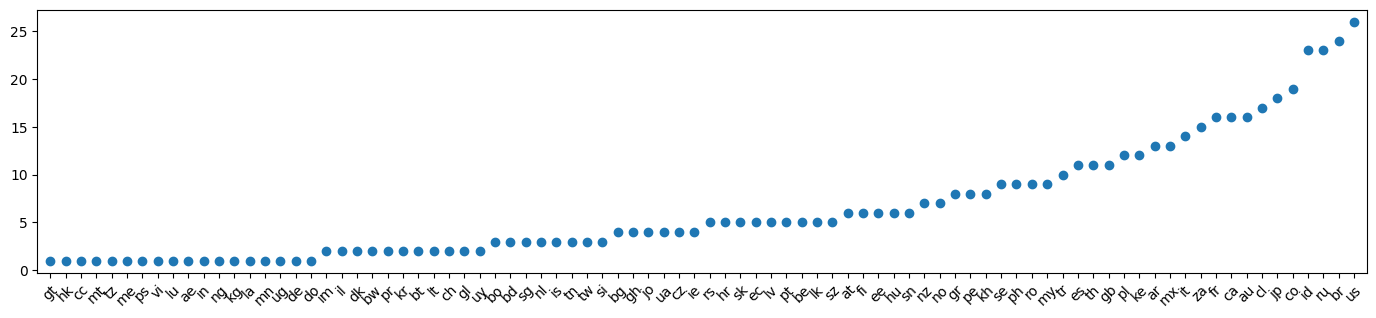

In [2]:
json_files = glob.glob("../data/raw/*.json")

codes = []

for f_name in json_files:
    with open(f_name) as f:
        d = json.load(f)
        code = d["rounds"][-1]["streakLocationCode"]

        if not code:
            number = f_name.split("/")[-1].split(".")[0]
            print("Check file:", number, code)
            continue
        codes.append(code)

occurrence = {}
for code in set(codes):
    occurrence[code] = codes.count(code)

occurrence = dict(sorted(occurrence.items(), key=lambda item: item[1]))
x = list(occurrence)
y = [i for _, i in occurrence.items()]
fig, ax = plt.subplots()
plt.tight_layout()
plt.xticks(rotation=45)
x_inches, y_inches = 15,3
fig.set_size_inches(x_inches,y_inches)
ax.margins(x=0.01)
ax.scatter(x, y);

# print(set(codes))

In [3]:
print(len(json_files))

560


In [4]:
import pycountry
import pandas as pd
import shutil 

In [11]:
images_meta_data = {"id": [], "lat": [], "lon": [], "alpha_2": []}

json_files = glob.glob("../data/raw/*.json")
for f_name in json_files:
    with open(f_name) as f:

        img_id = f_name.split("/")[-1].split(".")[0]

        img_info = json.load(f)["rounds"][-1]

        code = img_info["streakLocationCode"]
        if not code:
            print("Discarding file:", img_id)
            continue

                
        #add meta data to dictionary
        images_meta_data['id'].append(img_id)
        images_meta_data['lat'].append(img_info['lat'])
        images_meta_data['lon'].append(img_info['lng'])
        images_meta_data['alpha_2'].append(code)



df = pd.DataFrame(data=images_meta_data)

Discarding file: 00377
Discarding file: 00061
Discarding file: 00059


In [13]:
(list(pycountry.countries)[:5])

# maps 2 letter code to country name e.g. "US": "United States"
lookup = {c.alpha_2.lower() : c.name for c in list(pycountry.countries)} 

In [15]:

df['name'] = df['alpha_2'].map(lookup)
df.head()
df.shape

(557, 5)

In [8]:
def make_dirs():
    path = "../data/processed/by_countries"
    try:
        os.mkdir(path)
    except OSError as error:
        pass   

    names = set(df["name"])
    for n in names:
        try:
            os.mkdir(f"{path}/{n}")
        except OSError as error:
            pass

In [9]:
def copy_files():
    for index, r in df.iterrows():
        img_id = r["id"]
        dir_name = r["name"]

        src_path = f"../data/raw/{img_id}.png"
        dst_path = f"../data/processed/by_countries/{dir_name}/{img_id}.png"
        shutil.copyfile(src_path, dst_path)

In [10]:
def process_by_countries():
    make_dirs()
    copy_files()

process_by_countries()    